<a href="https://colab.research.google.com/github/hazelhee/inf1340-huanhe-final/blob/main/Final_project_huanhee_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#https://colab.research.google.com/drive/1mfvM395c4-qVsagbCNoY_Ap-nP1w9Ia6?usp=sharing

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
import plotly.express as px
from datascience import *

In [95]:
filename = 'UN_MigrantStockTotal_2015.xlsx'
#read all the data into a single dataframe
dfs = pd.read_excel(filename, sheet_name=None, header=[15])

In [96]:
dfs.keys()

dict_keys(['CONTENTS', 'Table 1', 'Table 2', 'Table 3', 'Table 4', 'Table 5', 'Table 6', 'ANNEX', 'NOTES'])

In [97]:
table1 = dfs['Table 1']
table1.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,1990,1995,2000,2005,2010,...,2000.1,2005.1,2010.1,2015.1,1990.2,1995.2,2000.2,2005.2,2010.2,2015.2
0,1,WORLD,NaN,900,NaN,152563212,160801752,172703309,191269100,221714243,...,87884839,97866674,114613714,126115435,74815702,79064275,84818470,93402426,107100529,117584801
1,2,Developed regions,(b),901,NaN,82378628,92306854,103375363,117181109,132560325,...,50536796,57217777,64081077,67618619,42115231,47214055,52838567,59963332,68479248,72863336
2,3,Developing regions,(c),902,NaN,70184584,68494898,69327946,74087991,89153918,...,37348043,40648897,50532637,58496816,32700471,31850220,31979903,33439094,38621281,44721465
3,4,Least developed countries,(d),941,NaN,11075966,11711703,10077824,9809634,10018128,...,5361902,5383009,5462714,6463217,5236216,5573685,4721920,4432371,4560536,5493028
4,5,Less developed regions excluding least develop...,NaN,934,NaN,59105261,56778501,59244124,64272611,79130668,...,31986141,35265888,45069923,52033599,27464255,26276535,27257983,29006723,34060745,39228437


In [98]:
#replace the '..' with NaN.
table1.replace('..',np.nan,inplace = True)
table1.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,1990,1995,2000,2005,2010,...,2000.1,2005.1,2010.1,2015.1,1990.2,1995.2,2000.2,2005.2,2010.2,2015.2
0,1,WORLD,NaN,900,NaN,152563212.0,160801752.0,172703309.0,191269100.0,221714243,...,87884839.0,97866674.0,114613714,126115435,74815702.0,79064275.0,84818470.0,93402426.0,107100529,117584801
1,2,Developed regions,(b),901,NaN,82378628.0,92306854.0,103375363.0,117181109.0,132560325,...,50536796.0,57217777.0,64081077,67618619,42115231.0,47214055.0,52838567.0,59963332.0,68479248,72863336
2,3,Developing regions,(c),902,NaN,70184584.0,68494898.0,69327946.0,74087991.0,89153918,...,37348043.0,40648897.0,50532637,58496816,32700471.0,31850220.0,31979903.0,33439094.0,38621281,44721465
3,4,Least developed countries,(d),941,NaN,11075966.0,11711703.0,10077824.0,9809634.0,10018128,...,5361902.0,5383009.0,5462714,6463217,5236216.0,5573685.0,4721920.0,4432371.0,4560536,5493028
4,5,Less developed regions excluding least develop...,NaN,934,NaN,59105261.0,56778501.0,59244124.0,64272611.0,79130668,...,31986141.0,35265888.0,45069923,52033599,27464255.0,26276535.0,27257983.0,29006723.0,34060745,39228437


In [99]:
#dropping columns with no meanings#
table1.drop(columns=['Unnamed: 0','Unnamed: 2','Unnamed: 4'], inplace=True)

In [100]:
#rename columns#
#tidy data principle 1: column names need to be informative, variable names and not values
table1.columns=['Destination', 'CountryCode', '1990B',
       '1995B', '2000B',
       '2005B', '2010B', '2015B', '1990M',
       '1995M', '2000M',
       '2005M', '2010M', '2015M', '1990F',
       '1995F', '2000F',
       '2005F', '2010F', '2015F']

In [101]:
#Problem: Column names are values not variable names
#tidy data principle #1: Column names need to be informative, variable names and not values
tidy_table1 = table1.melt(id_vars = ['Destination','CountryCode'], var_name = 'Year', value_name = 'Count')
tidy_table1.head(10)

,Destination,CountryCode,Year,Count
0,WORLD,900,1990B,152563212.0
1,Developed regions,901,1990B,82378628.0
2,Developing regions,902,1990B,70184584.0
3,Least developed countries,941,1990B,11075966.0
4,Less developed regions excluding least develop...,934,1990B,59105261.0
5,Sub-Saharan Africa,947,1990B,14690319.0
6,Africa,903,1990B,15690623.0
7,Eastern Africa,910,1990B,5964031.0
8,Burundi,108,1990B,333110.0
9,Comoros,174,1990B,14079.0


In [102]:
#Tidy data principle #2: each column needs to be consist of one and only one variable
#Split Year and the Gender columns
tidy_table1=(tidy_table1.assign(Gender = lambda x: x.Year.str[4].astype(str), Year = lambda x: x.Year.str[:4].astype(str)))
tidy_table1.head(10)

,Destination,CountryCode,Year,Count,Gender
0,WORLD,900,1990,152563212.0,B
1,Developed regions,901,1990,82378628.0,B
2,Developing regions,902,1990,70184584.0,B
3,Least developed countries,941,1990,11075966.0,B
4,Less developed regions excluding least develop...,934,1990,59105261.0,B
5,Sub-Saharan Africa,947,1990,14690319.0,B
6,Africa,903,1990,15690623.0,B
7,Eastern Africa,910,1990,5964031.0,B
8,Burundi,108,1990,333110.0,B
9,Comoros,174,1990,14079.0,B


In [103]:
tidy_table1['Gender']=tidy_table1['Gender'].apply(lambda x: "both sex" if (x == "B") 
                                                   else ("male" if (x == "M")
                                                  else "female"))
tidy_table1

,Destination,CountryCode,Year,Count,Gender
0,WORLD,900,1990,152563212.0,both sex
1,Developed regions,901,1990,82378628.0,both sex
2,Developing regions,902,1990,70184584.0,both sex
3,Least developed countries,941,1990,11075966.0,both sex
4,Less developed regions excluding least develop...,934,1990,59105261.0,both sex
...,...,...,...,...,...
4765,Samoa,882,2015,2460.0,female
4766,Tokelau,772,2015,254.0,female
4767,Tonga,776,2015,2604.0,female
4768,Tuvalu,798,2015,63.0,female


In [104]:
#tidy data principle #3: variables need to be in cells, not rows and columns
tidy_table1 = (tidy_table1.pivot_table(index = ["Destination","CountryCode","Year"],
             columns = "Gender",
             values = "Count").
             reset_index().
             rename_axis(None, axis=1))

In [105]:
tidy_table1

,Destination,CountryCode,Year,both sex,female,male
0,Afghanistan,4,1990,57686.0,25128.0,32558.0
1,Afghanistan,4,1995,71522.0,32417.0,39105.0
2,Afghanistan,4,2000,75917.0,33069.0,42848.0
3,Afghanistan,4,2005,87300.0,38026.0,49274.0
4,Afghanistan,4,2010,102246.0,44537.0,57709.0
...,...,...,...,...,...,...
1570,Zimbabwe,716,1995,431226.0,185214.0,246012.0
1571,Zimbabwe,716,2000,410041.0,176198.0,233843.0
1572,Zimbabwe,716,2005,392693.0,168723.0,223970.0
1573,Zimbabwe,716,2010,397891.0,170924.0,226967.0


In [106]:
#Select all continents from year to year#
table_Continent = tidy_table1[(tidy_table1.CountryCode == 900) | (tidy_table1.CountryCode == 903) | (tidy_table1.CountryCode == 935) | (tidy_table1.CountryCode == 908)|
                   (tidy_table1.CountryCode == 904)|(tidy_table1.CountryCode == 905)|(tidy_table1.CountryCode == 909)]
table_Continent.head(5)

,Destination,CountryCode,Year,both sex,female,male
6,Africa,903,1990,15690623.0,7411059.0,8279564.0
7,Africa,903,1995,16352814.0,7735883.0,8616931.0
8,Africa,903,2000,14800306.0,6943948.0,7856358.0
9,Africa,903,2005,15191146.0,6959709.0,8231437.0
10,Africa,903,2010,16840014.0,7800700.0,9039314.0


# Table 1: Trend  of total number of migrants in the world


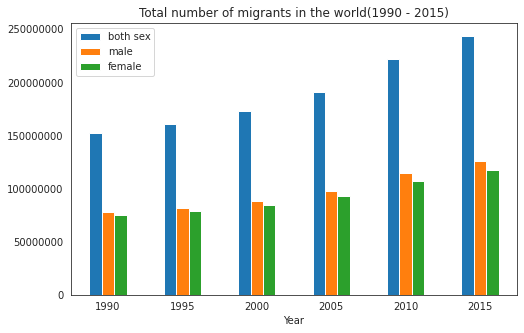

In [107]:
# Select the rows where Destination is WORLD
df_world=table_Continent.loc[table_Continent['Destination'] == 'WORLD']
# Select the 'Both sexes' column to see the total number of migrants across the world of the years.
df_world['both sex']
# Create a barplot
df_world.plot(kind='bar', figsize=(8,5), x="Year", y = ["both sex","male","female"],
              title='Total number of migrants in the world(1990 - 2015)').tick_params(labelrotation=0)
plt.ticklabel_format(style='plain', axis='y')

In [108]:
# Drop male and female columns
table_Continent_A=table_Continent.drop(columns=['male','female'])
table_Continent_A.head()

,Destination,CountryCode,Year,both sex
6,Africa,903,1990,15690623.0
7,Africa,903,1995,16352814.0
8,Africa,903,2000,14800306.0
9,Africa,903,2005,15191146.0
10,Africa,903,2010,16840014.0


In [109]:
#Pivot the year column with holding the value of both sex
table_Continent_A = (table_Continent_A.pivot_table(index = ["Destination","CountryCode"],
             columns = "Year",
             values = "both sex").
             reset_index().
             rename_axis(None, axis=1))
table_Continent_A.head()

,Destination,CountryCode,1990,1995,2000,2005,2010,2015
0,Africa,903,15690623.0,16352814.0,14800306.0,15191146.0,16840014.0,20649557.0
1,Asia,935,48142261.0,46548225.0,49340815.0,53371224.0,65914319.0,75081125.0
2,Europe,908,49219200.0,52842663.0,56271885.0,64086824.0,72374755.0,76145954.0
3,Latin America and the Caribbean,904,7169728.0,6694640.0,6578428.0,7233098.0,8238795.0,9233989.0
4,Northern America,905,27610542.0,33341147.0,40351848.0,45363387.0,51220996.0,54488725.0


In [110]:
# sort
table_Continent_A.sort_values(by = ['1990','1995','2000','2005','2010','2015'],ascending=False)

,Destination,CountryCode,1990,1995,2000,2005,2010,2015
6,WORLD,900,152563212.0,160801752.0,172703309.0,191269100.0,221714243.0,243700236.0
2,Europe,908,49219200.0,52842663.0,56271885.0,64086824.0,72374755.0,76145954.0
1,Asia,935,48142261.0,46548225.0,49340815.0,53371224.0,65914319.0,75081125.0
4,Northern America,905,27610542.0,33341147.0,40351848.0,45363387.0,51220996.0,54488725.0
0,Africa,903,15690623.0,16352814.0,14800306.0,15191146.0,16840014.0,20649557.0
3,Latin America and the Caribbean,904,7169728.0,6694640.0,6578428.0,7233098.0,8238795.0,9233989.0
5,Oceania,909,4730858.0,5022263.0,5360027.0,6023421.0,7125364.0,8100886.0


In [111]:
# transfer dataframe to table
Destination_Table = Table() 
Destination_Table = Destination_Table.with_columns("Destination", table_Continent_A["Destination"],
                                                 "1990", table_Continent_A["1990"],"1995", table_Continent_A["1995"],"2000", table_Continent_A["2000"],
                                                 "2005", table_Continent_A["2005"], "2010", table_Continent_A["2010"],"2015", table_Continent_A["2015"])
Destination_Table

Destination,1990,1995,2000,2005,2010,2015
Africa,1.56906e+07,1.63528e+07,1.48003e+07,1.51911e+07,1.684e+07,2.06496e+07
Asia,4.81423e+07,4.65482e+07,4.93408e+07,5.33712e+07,6.59143e+07,7.50811e+07
Europe,4.92192e+07,5.28427e+07,5.62719e+07,6.40868e+07,7.23748e+07,7.6146e+07
Latin America and the Caribbean,7.16973e+06,6.69464e+06,6.57843e+06,7.2331e+06,8.2388e+06,9.23399e+06
Northern America,2.76105e+07,3.33411e+07,4.03518e+07,4.53634e+07,5.1221e+07,5.44887e+07
Oceania,4.73086e+06,5.02226e+06,5.36003e+06,6.02342e+06,7.12536e+06,8.10089e+06
WORLD,1.52563e+08,1.60802e+08,1.72703e+08,1.91269e+08,2.21714e+08,2.437e+08


# Table 2: Migrant stock trend by continents

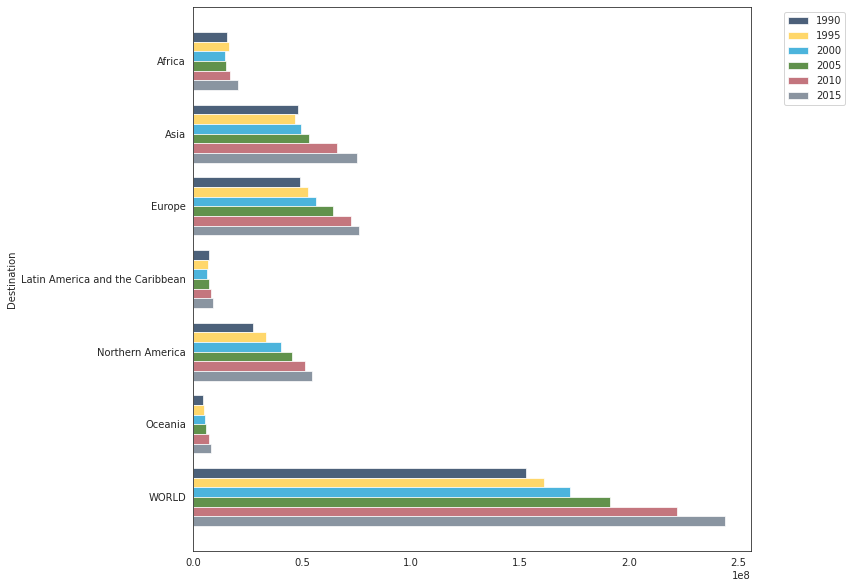

In [112]:
#create a barh
Destination_Table.barh('Destination',width=10,height=10)

In [113]:
#table 2 start#

In [114]:
table2 = dfs['Table 2']
table2.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,1990,1995,2000,2005,2010,2015,...,2000.1,2005.1,2010.1,2015.1,1990.2,1995.2,2000.2,2005.2,2010.2,2015.2
0,1,WORLD,NaN,900,5309667.699,5735123.084,6126622.121,6519635.850,6929725.043,7349472.099,...,3084537.662,3285082.249,3493956.904,3707205.753,2639243.998,2848487.191,3042084.459,3234553.601,3435768.139,3642266.346
1,2,Developed regions,(b),901,1144463.062,1169761.211,1188811.731,1208919.509,1233375.711,1251351.086,...,578010.218,587962.213,599955.476,609297.148,589207.436,601492.755,610801.513,620957.296,633420.235,642053.938
2,3,Developing regions,(c),902,4165204.637,4565361.873,4937810.390,5310716.341,5696349.332,6098121.013,...,2506527.444,2697120.036,2894001.428,3097908.605,2050036.562,2246994.436,2431282.946,2613596.305,2802347.904,3000212.408
3,4,Least developed countries,(d),941,510057.629,585189.354,664386.087,752804.951,847254.847,954157.804,...,331482.475,375757.715,422397.532,476031.179,256015.073,293162.612,332903.612,377047.236,424857.315,478126.625
4,5,Less developed regions excluding least develop...,NaN,934,3655147.008,3980172.519,4273424.303,4557911.390,4849094.485,5143963.209,...,2175044.969,2321362.321,2471603.896,2621877.426,1794021.489,1953831.824,2098379.334,2236549.069,2377490.589,2522085.783


In [115]:
#replace the '..' with NaN.
table2.replace('..',np.nan,inplace = True)
table2.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,1990,1995,2000,2005,2010,2015,...,2000.1,2005.1,2010.1,2015.1,1990.2,1995.2,2000.2,2005.2,2010.2,2015.2
0,1,WORLD,NaN,900,5309667.699,5735123.084,6126622.121,6519635.850,6929725.043,7349472.099,...,3084537.662,3285082.249,3493956.904,3707205.753,2639243.998,2848487.191,3042084.459,3234553.601,3435768.139,3642266.346
1,2,Developed regions,(b),901,1144463.062,1169761.211,1188811.731,1208919.509,1233375.711,1251351.086,...,578010.218,587962.213,599955.476,609297.148,589207.436,601492.755,610801.513,620957.296,633420.235,642053.938
2,3,Developing regions,(c),902,4165204.637,4565361.873,4937810.390,5310716.341,5696349.332,6098121.013,...,2506527.444,2697120.036,2894001.428,3097908.605,2050036.562,2246994.436,2431282.946,2613596.305,2802347.904,3000212.408
3,4,Least developed countries,(d),941,510057.629,585189.354,664386.087,752804.951,847254.847,954157.804,...,331482.475,375757.715,422397.532,476031.179,256015.073,293162.612,332903.612,377047.236,424857.315,478126.625
4,5,Less developed regions excluding least develop...,NaN,934,3655147.008,3980172.519,4273424.303,4557911.390,4849094.485,5143963.209,...,2175044.969,2321362.321,2471603.896,2621877.426,1794021.489,1953831.824,2098379.334,2236549.069,2377490.589,2522085.783


In [116]:
#dropping columns with no meanings#
table2.drop(columns=['Unnamed: 0','Unnamed: 2'], inplace=True)

In [117]:
#rename columns#
table2.columns=['Destination', 'CountryCode', '1990B',
       '1995B', '2000B',
       '2005B', '2010B', '2015B', '1990M',
       '1995M', '2000M',
       '2005M', '2010M', '2015M', '1990F',
       '1995F', '2000F',
       '2005F', '2010F', '2015F']

In [118]:
#Problem: Column names are values not variable names
#tidy data principle #1: Column names need to be informative, variable names and not values
tidy_table2 = table2.melt(id_vars = ['Destination','CountryCode'], var_name = 'Year', value_name = 'Count')
tidy_table2.head(5)

,Destination,CountryCode,Year,Count
0,WORLD,900,1990B,5309667.699
1,Developed regions,901,1990B,1144463.062
2,Developing regions,902,1990B,4165204.637
3,Least developed countries,941,1990B,510057.629
4,Less developed regions excluding least develop...,934,1990B,3655147.008


In [119]:
#tidy data principle #2
tidy_table2=(tidy_table2.assign(Gender = lambda x: x.Year.str[4].astype(str), Year = lambda x: x.Year.str[:4].astype(str)))
tidy_table2.head(10)

,Destination,CountryCode,Year,Count,Gender
0,WORLD,900,1990,5309667.699,B
1,Developed regions,901,1990,1144463.062,B
2,Developing regions,902,1990,4165204.637,B
3,Least developed countries,941,1990,510057.629,B
4,Less developed regions excluding least develop...,934,1990,3655147.008,B
5,Sub-Saharan Africa,947,1990,491497.691,B
6,Africa,903,1990,631614.304,B
7,Eastern Africa,910,1990,198231.687,B
8,Burundi,108,1990,5613.141,B
9,Comoros,174,1990,415.144,B


In [120]:
tidy_table2['Gender']=tidy_table2['Gender'].apply(lambda x: "both sex" if (x == "B") 
                                                   else ("male" if (x == "M")
                                                  else "female"))
tidy_table2

,Destination,CountryCode,Year,Count,Gender
0,WORLD,900,1990,5309667.699,both sex
1,Developed regions,901,1990,1144463.062,both sex
2,Developing regions,902,1990,4165204.637,both sex
3,Least developed countries,941,1990,510057.629,both sex
4,Less developed regions excluding least develop...,934,1990,3655147.008,both sex
...,...,...,...,...,...
4765,Samoa,882,2015,93.584,female
4766,Tokelau,772,2015,NaN,female
4767,Tonga,776,2015,52.931,female
4768,Tuvalu,798,2015,NaN,female


In [121]:
#tidy data principle #3: variables need to be in cells, not rows and columns
tidy_table2 = (tidy_table2.pivot_table(index = ["Destination","CountryCode","Year"],
             columns = "Gender",
             values = "Count").
             reset_index().
             rename_axis(None, axis=1))

In [122]:
tidy_table2

,Destination,CountryCode,Year,both sex,female,male
0,Afghanistan,4,1990,12067.570,5887.736,6179.834
1,Afghanistan,4,1995,16772.522,8090.080,8682.442
2,Afghanistan,4,2000,19701.940,9555.403,10146.537
3,Afghanistan,4,2005,24399.948,11783.622,12616.326
4,Afghanistan,4,2010,27962.207,13594.574,14367.633
...,...,...,...,...,...,...
1585,Zimbabwe,716,1995,11683.136,5877.504,5805.632
1586,Zimbabwe,716,2000,12499.981,6280.133,6219.848
1587,Zimbabwe,716,2005,12984.418,6548.180,6436.238
1588,Zimbabwe,716,2010,13973.897,7068.861,6905.036


In [123]:
table2_Continent = tidy_table2[(tidy_table2.CountryCode == 900) | (tidy_table2.CountryCode == 903) | (tidy_table2.CountryCode == 935) | (tidy_table2.CountryCode == 908)|
                   (tidy_table2.CountryCode == 904)|(tidy_table2.CountryCode == 905)|(tidy_table2.CountryCode == 909)]
table2_Continent.head(5)

,Destination,CountryCode,Year,both sex,female,male
6,Africa,903,1990,631614.304,316542.926,315071.378
7,Africa,903,1995,720416.386,361007.568,359408.818
8,Africa,903,2000,814063.149,407657.585,406405.564
9,Africa,903,2005,920238.945,460648.416,459590.529
10,Africa,903,2010,1044106.862,522367.132,521739.730


# Table 3: Total number of population in the world

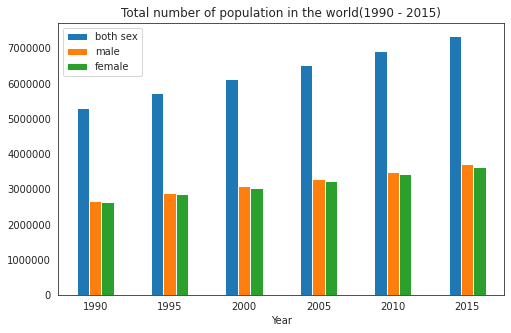

In [124]:
# Select the rows where Destination is WORLD
df_world=table2_Continent.loc[table2_Continent['Destination'] == 'WORLD']
# Select the 'Both sexes' column to see the total number of migrants across the world of the years.
df_world['both sex']
# Create a barplot
df_world.plot(kind='bar', figsize=(8,5), x="Year", y = ["both sex","male","female"],
              title='Total number of population in the world(1990 - 2015)').tick_params(labelrotation=0)
plt.ticklabel_format(style='plain', axis='y')

In [125]:
#table 3 start#

In [126]:
table3 = dfs['Table 3']
table3.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,1990,1995,2000,2005,2010,...,2000.1,2005.1,2010.1,2015.1,1990.2,1995.2,2000.2,2005.2,2010.2,2015.2
0,1,WORLD,NaN,900,NaN,2.87331,2.803806,2.818899,2.933739,3.199467,...,2.849206,2.979124,3.280341,3.4019,2.83474,2.775658,2.788169,2.887645,3.117222,3.228342
1,2,Developed regions,(b),901,NaN,7.198015,7.891085,8.695688,9.693045,10.747765,...,8.743236,9.73154,10.680972,11.097807,7.147777,7.84948,8.650694,9.656595,10.811029,11.348476
2,3,Developing regions,(c),902,NaN,1.685021,1.500317,1.404022,1.395066,1.565106,...,1.490031,1.507122,1.746117,1.888268,1.595116,1.417459,1.315351,1.279428,1.378176,1.49061
3,4,Least developed countries,(d),941,NaN,2.171513,2.001353,1.516863,1.303078,1.182422,...,1.617552,1.432574,1.293264,1.35773,2.045276,1.901226,1.418405,1.175548,1.073428,1.148865
4,5,Less developed regions excluding least develop...,NaN,934,NaN,1.617042,1.426534,1.386338,1.410133,1.631865,...,1.470597,1.519189,1.823509,1.984593,1.530877,1.344872,1.299002,1.296941,1.432634,1.555397


In [127]:
#replace the '..' with NaN.
table3.replace('..',np.nan,inplace = True)
table3.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,1990,1995,2000,2005,2010,...,2000.1,2005.1,2010.1,2015.1,1990.2,1995.2,2000.2,2005.2,2010.2,2015.2
0,1,WORLD,NaN,900,NaN,2.873310,2.803806,2.818899,2.933739,3.199467,...,2.849206,2.979124,3.280341,3.401900,2.834740,2.775658,2.788169,2.887645,3.117222,3.228342
1,2,Developed regions,(b),901,NaN,7.198015,7.891085,8.695688,9.693045,10.747765,...,8.743236,9.731540,10.680972,11.097807,7.147777,7.849480,8.650694,9.656595,10.811029,11.348476
2,3,Developing regions,(c),902,NaN,1.685021,1.500317,1.404022,1.395066,1.565106,...,1.490031,1.507122,1.746117,1.888268,1.595116,1.417459,1.315351,1.279428,1.378176,1.490610
3,4,Least developed countries,(d),941,NaN,2.171513,2.001353,1.516863,1.303078,1.182422,...,1.617552,1.432574,1.293264,1.357730,2.045276,1.901226,1.418405,1.175548,1.073428,1.148865
4,5,Less developed regions excluding least develop...,NaN,934,NaN,1.617042,1.426534,1.386338,1.410133,1.631865,...,1.470597,1.519189,1.823509,1.984593,1.530877,1.344872,1.299002,1.296941,1.432634,1.555397


In [128]:
#dropping columns with no meanings#
table3.drop(columns=['Unnamed: 0','Unnamed: 2','Unnamed: 4'], inplace=True)

In [129]:
#rename columns#
table3.columns=['Destination', 'CountryCode', '1990B',
       '1995B', '2000B',
       '2005B', '2010B', '2015B', '1990M',
       '1995M', '2000M',
       '2005M', '2010M', '2015M', '1990F',
       '1995F', '2000F',
       '2005F', '2010F', '2015F']

In [130]:
#tidy data principle #1
tidy_table3 = table3.melt(id_vars = ['Destination','CountryCode'], var_name = 'Year', value_name = 'Count')
tidy_table3.head(5)

,Destination,CountryCode,Year,Count
0,WORLD,900,1990B,2.873310
1,Developed regions,901,1990B,7.198015
2,Developing regions,902,1990B,1.685021
3,Least developed countries,941,1990B,2.171513
4,Less developed regions excluding least develop...,934,1990B,1.617042


In [131]:
#tidy data principle #2
tidy_table3=(tidy_table3.assign(Gender = lambda x: x.Year.str[4].astype(str), Year = lambda x: x.Year.str[:4].astype(str)))
tidy_table3.head(10)

,Destination,CountryCode,Year,Count,Gender
0,WORLD,900,1990,2.873310,B
1,Developed regions,901,1990,7.198015,B
2,Developing regions,902,1990,1.685021,B
3,Least developed countries,941,1990,2.171513,B
4,Less developed regions excluding least develop...,934,1990,1.617042,B
5,Sub-Saharan Africa,947,1990,2.988889,B
6,Africa,903,1990,2.484210,B
7,Eastern Africa,910,1990,3.008616,B
8,Burundi,108,1990,5.934467,B
9,Comoros,174,1990,3.391353,B


In [132]:
tidy_table3['Gender']=tidy_table3['Gender'].apply(lambda x: "both sex" if (x == "B") 
                                                   else ("male" if (x == "M")
                                                  else "female"))
tidy_table3

,Destination,CountryCode,Year,Count,Gender
0,WORLD,900,1990,2.873310,both sex
1,Developed regions,901,1990,7.198015,both sex
2,Developing regions,902,1990,1.685021,both sex
3,Least developed countries,941,1990,2.171513,both sex
4,Less developed regions excluding least develop...,934,1990,1.617042,both sex
...,...,...,...,...,...
4765,Samoa,882,2015,2.628654,female
4766,Tokelau,772,2015,NaN,female
4767,Tonga,776,2015,4.919612,female
4768,Tuvalu,798,2015,NaN,female


In [133]:
#tidy data principle #3: variables need to be in cells, not rows and columns
tidy_table3 = (tidy_table3.pivot_table(index = ["Destination","CountryCode","Year"],
             columns = "Gender",
             values = "Count").
             reset_index())

In [134]:
tidy_table3

Gender,Destination,CountryCode,Year,both sex,female,male
0,Afghanistan,4,1990,0.478025,0.426785,0.526843
1,Afghanistan,4,1995,0.426424,0.400701,0.450392
2,Afghanistan,4,2000,0.385328,0.346076,0.422292
3,Afghanistan,4,2005,0.357788,0.322702,0.390557
4,Afghanistan,4,2010,0.365658,0.327609,0.401660
...,...,...,...,...,...,...
1566,Zimbabwe,716,1995,3.691012,3.151236,4.237471
1567,Zimbabwe,716,2000,3.280333,2.805641,3.759626
1568,Zimbabwe,716,2005,3.024340,2.576640,3.479828
1569,Zimbabwe,716,2010,2.847388,2.417985,3.286978


In [135]:
table3_Continent = tidy_table3[(tidy_table3.CountryCode == 900) | (tidy_table3.CountryCode == 903) | (tidy_table3.CountryCode == 935) | (tidy_table3.CountryCode == 908)|
                   (tidy_table3.CountryCode == 904)|(tidy_table3.CountryCode == 905)|(tidy_table3.CountryCode == 909)]
table3_Continent.head()

Gender,Destination,CountryCode,Year,both sex,female,male
6,Africa,903,1990,2.484210,2.341249,2.627838
7,Africa,903,1995,2.269911,2.142859,2.397529
8,Africa,903,2000,1.818078,1.703378,1.933132
9,Africa,903,2005,1.650783,1.510851,1.791037
10,Africa,903,2010,1.612863,1.493337,1.732533


# Table 4：Migrant stock as a percentage of the total population in the world

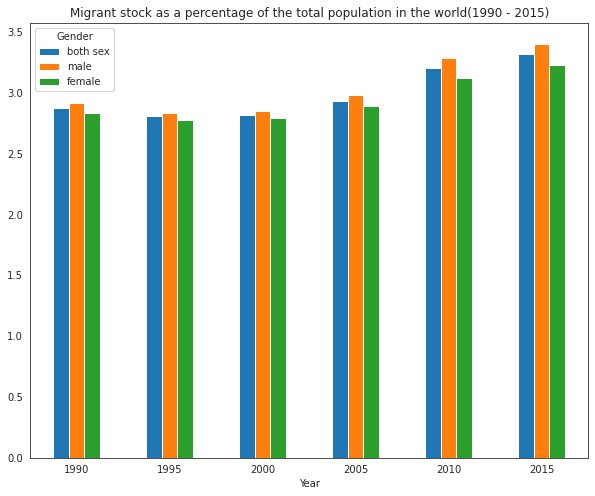

In [136]:
# Select the rows where Destination is WORLD
df_world=table3_Continent.loc[table3_Continent['Destination'] == 'WORLD']
# Select the 'Both sexes' column to see the total number of migrants across the world of the years.
df_world['both sex']
# Create a barplot
df_world.plot(kind='bar', figsize=(10,8), x="Year", y = ["both sex","male","female"],
              title='Migrant stock as a percentage of the total population in the world(1990 - 2015)').tick_params(labelrotation=0)
plt.ticklabel_format(style='plain', axis='y')

# Table 5: Migrant stock as percentage of total population by continent 

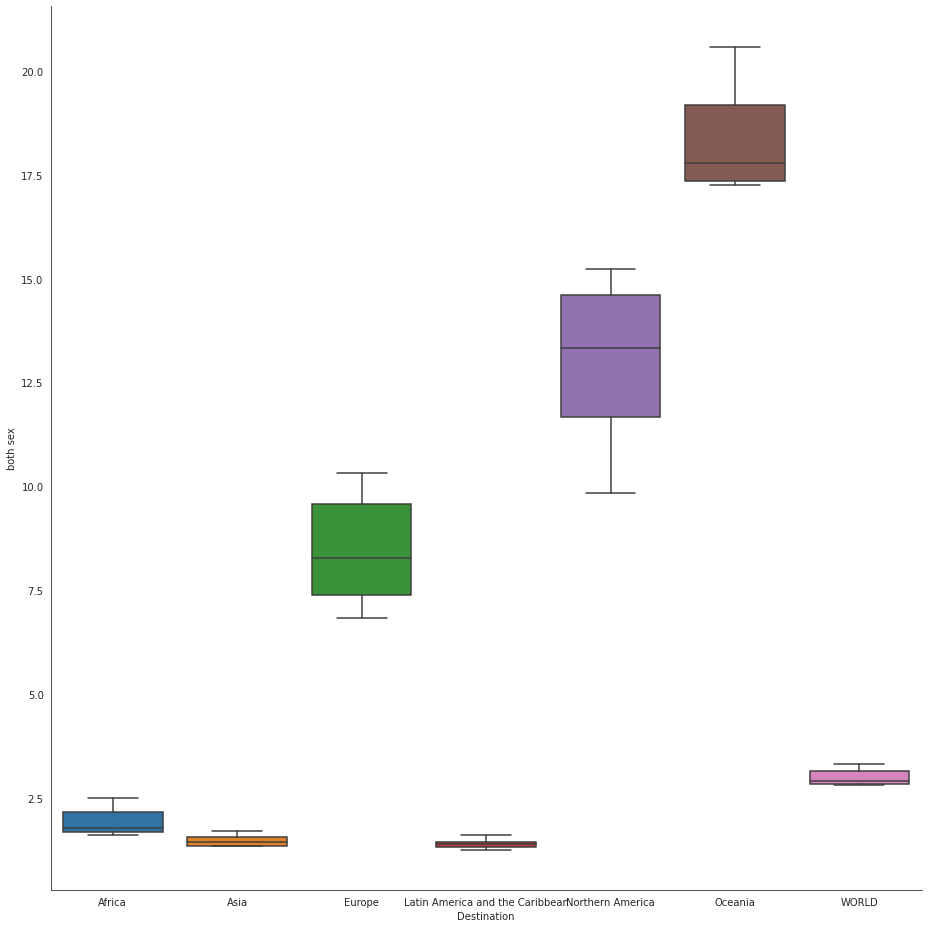

In [137]:
#Create a bot plot to discuss the percentage of change
sns.catplot(data=table3_Continent, kind="box", x="Destination", y="both sex", height=13)

In [138]:
#table 4 start

In [139]:
table4 = dfs['Table 4']
table4.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,1990,1995,2000,2005,2010,2015
0,1,WORLD,NaN,900,NaN,49.03915,49.16879,49.112244,48.832993,48.305660,48.249769
1,2,Developed regions,(b),901,NaN,51.123977,51.149024,51.113307,51.171501,51.658932,51.866687
2,3,Developing regions,(c),902,NaN,46.592099,46.500135,46.128444,45.134297,43.319780,43.327078
3,4,Least developed countries,(d),941,NaN,47.261155,47.571664,46.826689,45.157406,45.499573,45.942752
4,5,Less developed regions excluding least develop...,NaN,934,NaN,46.466684,46.279022,46.009598,45.130768,43.043672,42.984398


In [140]:
#replace the '..' with NaN.
table4.replace('..',np.nan,inplace = True)
table4.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,1990,1995,2000,2005,2010,2015
0,1,WORLD,NaN,900,NaN,49.039150,49.168790,49.112244,48.832993,48.305660,48.249769
1,2,Developed regions,(b),901,NaN,51.123977,51.149024,51.113307,51.171501,51.658932,51.866687
2,3,Developing regions,(c),902,NaN,46.592099,46.500135,46.128444,45.134297,43.319780,43.327078
3,4,Least developed countries,(d),941,NaN,47.261155,47.571664,46.826689,45.157406,45.499573,45.942752
4,5,Less developed regions excluding least develop...,NaN,934,NaN,46.466684,46.279022,46.009598,45.130768,43.043672,42.984398


In [141]:
#dropping columns with no meanings#
table4.drop(columns=['Unnamed: 0','Unnamed: 2'], inplace=True)

In [142]:
#rename columns#
table4.columns=['Destination', 'CountryCode', 'Type of data', '1990F',
       '1995F', '2000F', '2005F', '2010F', '2015F']

In [143]:
tidy_table4 = table4.melt(id_vars = ['Destination','CountryCode','Type of data'], var_name = 'Year', value_name = 'Count')
tidy_table4.head(5)

,Destination,CountryCode,Type of data,Year,Count
0,WORLD,900,NaN,1990F,49.039150
1,Developed regions,901,NaN,1990F,51.123977
2,Developing regions,902,NaN,1990F,46.592099
3,Least developed countries,941,NaN,1990F,47.261155
4,Less developed regions excluding least develop...,934,NaN,1990F,46.466684


In [144]:
tidy_table4=(tidy_table4.assign(Gender = lambda x: x.Year.str[4].astype(str), Year = lambda x: x.Year.str[:4].astype(str)))
tidy_table4.head(10)

,Destination,CountryCode,Type of data,Year,Count,Gender
0,WORLD,900,NaN,1990,49.039150,F
1,Developed regions,901,NaN,1990,51.123977,F
2,Developing regions,902,NaN,1990,46.592099,F
3,Least developed countries,941,NaN,1990,47.261155,F
4,Less developed regions excluding least develop...,934,NaN,1990,46.466684,F
5,Sub-Saharan Africa,947,NaN,1990,47.276121,F
6,Africa,903,NaN,1990,47.232408,F
7,Eastern Africa,910,NaN,1990,48.504812,F
8,Burundi,108,B R,1990,50.987061,F
9,Comoros,174,B,1990,52.290646,F


In [145]:
tidy_table4['Gender']=tidy_table4['Gender'].apply(lambda x: "both sex" if (x == "B") 
                                                   else ("male" if (x == "M")
                                                  else "female"))
tidy_table4

,Destination,CountryCode,Type of data,Year,Count,Gender
0,WORLD,900,NaN,1990,49.039150,female
1,Developed regions,901,NaN,1990,51.123977,female
2,Developing regions,902,NaN,1990,46.592099,female
3,Least developed countries,941,NaN,1990,47.261155,female
4,Less developed regions excluding least develop...,934,NaN,1990,46.466684,female
...,...,...,...,...,...,...
1585,Samoa,882,B,2015,49.908704,female
1586,Tokelau,772,B,2015,52.156057,female
1587,Tonga,776,B,2015,45.437096,female
1588,Tuvalu,798,C,2015,44.680851,female


In [146]:
#tidy data principle #3: variables need to be in cells, not rows and columns
tidy_table4 = (tidy_table4.pivot_table(index = ["Destination","CountryCode","Type of data","Year"],
             columns = "Gender",
             values = "Count").
             reset_index())

In [147]:
tidy_table4

Gender,Destination,CountryCode,Type of data,Year,female
0,Afghanistan,4,B,1990,43.559963
1,Afghanistan,4,B,1995,45.324516
2,Afghanistan,4,B,2000,43.559414
3,Afghanistan,4,B,2005,43.557847
4,Afghanistan,4,B,2010,43.558672
...,...,...,...,...,...
1372,Zimbabwe,716,B R,1995,42.950564
1373,Zimbabwe,716,B R,2000,42.970825
1374,Zimbabwe,716,B R,2005,42.965625
1375,Zimbabwe,716,B R,2010,42.957493


In [148]:
table4_SC = tidy_table4[(tidy_table3.CountryCode == 156) | (tidy_table4.CountryCode == 392) | (tidy_table4.CountryCode == 360)|
                   (tidy_table4.CountryCode == 586)|(tidy_table4.CountryCode == 356)|(tidy_table4.CountryCode == 756) | (tidy_table4.CountryCode == 192) | (tidy_table4.CountryCode == 756)|
                   (tidy_table4.CountryCode == 124) | (tidy_table4.CountryCode == 840) | (tidy_table4.CountryCode == 826) | (tidy_table4.CountryCode == 804)]
table4_SC

<ipython-input-148-02d08ff61bab>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Gender,Destination,CountryCode,Type of data,Year,female
222,Canada,124,B,1990,51.315551
223,Canada,124,B,1995,51.568088
224,Canada,124,B,2000,51.756595
225,Canada,124,B,2005,52.034131
226,Canada,124,B,2010,52.130897
...,...,...,...,...,...
1312,United States of America,840,B,1995,50.679650
1313,United States of America,840,B,2000,50.276444
1314,United States of America,840,B,2005,50.036345
1315,United States of America,840,B,2010,50.899999


# Table 6: Female migrant as percentage of the international migrant by main counties

In [149]:
#Creat linepot
px.line(data_frame= table4_SC,
             x = 'Year', y = 'female', 
             facet_col = 'Destination',
             facet_col_wrap = 3)

In [150]:
#table 5 start

In [151]:
table5 = dfs['Table 5']
table5.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015,1990-1995.1,1995-2000.1,2000-2005.1,2005-2010.1,2010-2015.1,1990-1995.2,1995-2000.2,2000-2005.2,2005-2010.2,2010-2015.2
0,1,WORLD,NaN,900,NaN,1.051865,1.428058,2.042124,2.95416,1.890991,1.000922,1.450294,2.151575,3.159228,1.912603,1.104667,1.405044,1.92808,2.737012,1.867837
1,2,Developed regions,(b),901,NaN,2.275847,2.264965,2.50708,2.466343,1.160824,2.265595,2.279583,2.483259,2.265689,1.074685,2.285643,2.250995,2.529838,2.65595,1.241097
2,3,Developing regions,(c),902,NaN,-0.487389,0.241777,1.328107,3.702217,2.929634,-0.45298,0.380246,1.693824,4.352954,2.927058,-0.526904,0.081268,0.89236,2.881555,2.933003
3,4,Least developed countries,(d),941,NaN,1.118175,-3.001139,-0.539636,0.419137,3.526927,1.000073,-2.718952,0.078575,0.293964,3.363629,1.249146,-3.316818,-1.265617,0.57011,3.720790
4,5,Less developed regions excluding least develop...,NaN,934,NaN,-0.803244,0.850177,1.62934,4.159339,2.852687,-0.733256,0.950231,1.952269,4.90598,2.873490,-0.88418,0.733402,1.243624,3.212358,2.825127


In [152]:
#replace the '..' with NaN.
table5.replace('..',np.nan,inplace = True)
table5.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015,1990-1995.1,1995-2000.1,2000-2005.1,2005-2010.1,2010-2015.1,1990-1995.2,1995-2000.2,2000-2005.2,2005-2010.2,2010-2015.2
0,1,WORLD,NaN,900,NaN,1.051865,1.428058,2.042124,2.954160,1.890991,1.000922,1.450294,2.151575,3.159228,1.912603,1.104667,1.405044,1.928080,2.737012,1.867837
1,2,Developed regions,(b),901,NaN,2.275847,2.264965,2.507080,2.466343,1.160824,2.265595,2.279583,2.483259,2.265689,1.074685,2.285643,2.250995,2.529838,2.655950,1.241097
2,3,Developing regions,(c),902,NaN,-0.487389,0.241777,1.328107,3.702217,2.929634,-0.452980,0.380246,1.693824,4.352954,2.927058,-0.526904,0.081268,0.892360,2.881555,2.933003
3,4,Least developed countries,(d),941,NaN,1.118175,-3.001139,-0.539636,0.419137,3.526927,1.000073,-2.718952,0.078575,0.293964,3.363629,1.249146,-3.316818,-1.265617,0.570110,3.720790
4,5,Less developed regions excluding least develop...,NaN,934,NaN,-0.803244,0.850177,1.629340,4.159339,2.852687,-0.733256,0.950231,1.952269,4.905980,2.873490,-0.884180,0.733402,1.243624,3.212358,2.825127


In [153]:
#dropping columns with no meanings#
table5.drop(columns=['Unnamed: 0','Unnamed: 2'], inplace=True)

In [154]:
#rename columns#
table5.columns=['Destination', 'CountryCode', 'Type of data', '1990-1995B',
       '1995-2000B', '2000-2005B', '2005-2010B', '2010-2015B', '1990-1995M', '1995-2000M',
       '2000-2005M', '2005-2010M', '2010-2015M', '1990-1995F', '1995-2000F', '2000-2005F',
       '2005-2010F', '2010-2015F']

In [155]:
tidy_table5 = table5.melt(id_vars = ['Destination','CountryCode','Type of data'], var_name = 'Year', value_name = 'Count')
tidy_table5.head(5)

,Destination,CountryCode,Type of data,Year,Count
0,WORLD,900,NaN,1990-1995B,1.051865
1,Developed regions,901,NaN,1990-1995B,2.275847
2,Developing regions,902,NaN,1990-1995B,-0.487389
3,Least developed countries,941,NaN,1990-1995B,1.118175
4,Less developed regions excluding least develop...,934,NaN,1990-1995B,-0.803244


In [156]:
tidy_table5=(tidy_table5.assign(Gender = lambda x: x.Year.str[9].astype(str), Year = lambda x: x.Year.str[:9].astype(str)))
tidy_table5.head(10)

,Destination,CountryCode,Type of data,Year,Count,Gender
0,WORLD,900,NaN,1990-1995,1.051865,B
1,Developed regions,901,NaN,1990-1995,2.275847,B
2,Developing regions,902,NaN,1990-1995,-0.487389,B
3,Least developed countries,941,NaN,1990-1995,1.118175,B
4,Less developed regions excluding least develop...,934,NaN,1990-1995,-0.803244,B
5,Sub-Saharan Africa,947,NaN,1990-1995,0.845374,B
6,Africa,903,NaN,1990-1995,0.826734,B
7,Eastern Africa,910,NaN,1990-1995,-3.435412,B
8,Burundi,108,B R,1990-1995,-5.355717,B
9,Comoros,174,B,1990-1995,-0.199873,B


In [157]:
tidy_table5['Gender']=tidy_table5['Gender'].apply(lambda x: "both sex" if (x == "B") 
                                                   else ("male" if (x == "M")
                                                  else "female"))
tidy_table5

,Destination,CountryCode,Type of data,Year,Count,Gender
0,WORLD,900,NaN,1990-1995,1.051865,both sex
1,Developed regions,901,NaN,1990-1995,2.275847,both sex
2,Developing regions,902,NaN,1990-1995,-0.487389,both sex
3,Least developed countries,941,NaN,1990-1995,1.118175,both sex
4,Less developed regions excluding least develop...,934,NaN,1990-1995,-0.803244,both sex
...,...,...,...,...,...,...
3970,Samoa,882,B,2010-2015,-0.545343,female
3971,Tokelau,772,B,2010-2015,2.603250,female
3972,Tonga,776,B,2010-2015,2.526318,female
3973,Tuvalu,798,C,2010-2015,-1.819436,female


In [158]:
#tidy data principle #3: variables need to be in cells, not rows and columns
tidy_table5 = (tidy_table5.pivot_table(index = ["Destination","CountryCode","Type of data","Year"],
             columns = "Gender",
             values = "Count").
             reset_index())

In [159]:
tidy_table5

Gender,Destination,CountryCode,Type of data,Year,both sex,female,male
0,Afghanistan,4,B,1990-1995,4.299812,5.094004,3.664544
1,Afghanistan,4,B,1995-2000,1.192711,0.398266,1.828173
2,Afghanistan,4,B,2000-2005,2.794196,2.793477,2.794752
3,Afghanistan,4,B,2005-2010,3.160624,3.161003,3.160332
4,Afghanistan,4,B,2010-2015,26.379880,28.900067,24.191602
...,...,...,...,...,...,...,...
1140,Zimbabwe,716,B R,1990-1995,-7.480574,-7.890123,-7.166608
1141,Zimbabwe,716,B R,1995-2000,-1.007503,-0.998071,-1.014607
1142,Zimbabwe,716,B R,2000-2005,-0.864580,-0.867001,-0.862757
1143,Zimbabwe,716,B R,2005-2010,0.262999,0.259214,0.265850


In [160]:
#table 6 start

In [161]:
table6 = dfs['Table 6']
table6.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,1990,1995,2000,2005,2010,...,1995.1,2000.1,2005.1,2010.1,2015.1,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015
0,1,WORLD,NaN,900,NaN,18836571,17853840,15827803,13276733,15370755,...,11.103013,9.164736,6.941389,6.932687,8.033424,-2.123497,-3.837069,-5.557223,-0.025089,2.947267
1,2,Developed regions,(b),901,NaN,2014564,3609670,2997256,2361229,2046917,...,3.910511,2.899391,2.015025,1.544140,1.391085,9.388424,-5.983348,-7.277379,-5.323293,-2.087656
2,3,Developing regions,(c),902,NaN,16822007,14244170,12830547,10915504,13323838,...,20.795958,18.507035,14.733162,14.944759,17.073768,-2.839417,-2.332154,-4.561,0.285195,2.663652
3,4,Least developed countries,(d),941,NaN,5048391,5160131,3047488,2363782,1957884,...,44.041961,30.221557,24.08243,19.533425,28.801534,-0.680327,-7.531747,-4.541459,-4.187109,7.766031
4,5,Less developed regions excluding least develop...,NaN,934,NaN,11773616,9084039,9783059,8551722,11365954,...,15.999082,16.51313,13.305391,14.363526,15.537313,-4.3836,0.632489,-4.319731,1.530456,1.571047


In [162]:
#replace the '..' with NaN.
table6.replace('..',np.nan,inplace = True)
table6.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,1990,1995,2000,2005,2010,...,1995.1,2000.1,2005.1,2010.1,2015.1,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015
0,1,WORLD,NaN,900,NaN,18836571.0,17853840.0,15827803.0,13276733.0,15370755,...,11.103013,9.164736,6.941389,6.932687,8.033424,-2.123497,-3.837069,-5.557223,-0.025089,2.947267
1,2,Developed regions,(b),901,NaN,2014564.0,3609670.0,2997256.0,2361229.0,2046917,...,3.910511,2.899391,2.015025,1.544140,1.391085,9.388424,-5.983348,-7.277379,-5.323293,-2.087656
2,3,Developing regions,(c),902,NaN,16822007.0,14244170.0,12830547.0,10915504.0,13323838,...,20.795958,18.507035,14.733162,14.944759,17.073768,-2.839417,-2.332154,-4.561000,0.285195,2.663652
3,4,Least developed countries,(d),941,NaN,5048391.0,5160131.0,3047488.0,2363782.0,1957884,...,44.041961,30.221557,24.082430,19.533425,28.801534,-0.680327,-7.531747,-4.541459,-4.187109,7.766031
4,5,Less developed regions excluding least develop...,NaN,934,NaN,11773616.0,9084039.0,9783059.0,8551722.0,11365954,...,15.999082,16.513130,13.305391,14.363526,15.537313,-4.383600,0.632489,-4.319731,1.530456,1.571047


In [163]:
#dropping columns with no meanings#
table6.drop(columns=['Unnamed: 0','Unnamed: 2'], inplace=True)

In [164]:
#rename columns#
table6.columns=['Destination', 'CountryCode', 'Type of data', '1990E',
       '1995E', '2000E', '2005E', '2010E', '2015E', '1990R',
       '1995R', '2000R', '2005R', '2010R', '2015R', '1990-1995A', '1995-2000A', '2000-2005A',
       '2005-2010A', '2010-2015A']

In [165]:
#Tidy data principle #4: each table column needs to have a singular data type
#Split table 
table6_E = table6[['Destination', 'CountryCode', 'Type of data', '1990E',
       '1995E', '2000E', '2005E', '2010E', '2015E']]
table6_E.head(5)

,Destination,CountryCode,Type of data,1990E,1995E,2000E,2005E,2010E,2015E
0,WORLD,900,NaN,18836571.0,17853840.0,15827803.0,13276733.0,15370755,19577474
1,Developed regions,901,NaN,2014564.0,3609670.0,2997256.0,2361229.0,2046917,1954224
2,Developing regions,902,NaN,16822007.0,14244170.0,12830547.0,10915504.0,13323838,17623250
3,Least developed countries,941,NaN,5048391.0,5160131.0,3047488.0,2363782.0,1957884,3443582
4,Less developed regions excluding least develop...,934,NaN,11773616.0,9084039.0,9783059.0,8551722.0,11365954,14179668


In [166]:
#tidy data principle #2: Column names need to be informative, variable names and not values
table6_E_tidy = table6_E.melt(id_vars = ['Destination','CountryCode','Type of data'], var_name = 'Year', value_name = 'Estimated')
table6_E_tidy.head(10)

,Destination,CountryCode,Type of data,Year,Estimated
0,WORLD,900,NaN,1990E,18836571.0
1,Developed regions,901,NaN,1990E,2014564.0
2,Developing regions,902,NaN,1990E,16822007.0
3,Least developed countries,941,NaN,1990E,5048391.0
4,Less developed regions excluding least develop...,934,NaN,1990E,11773616.0
5,Sub-Saharan Africa,947,NaN,1990E,5516042.0
6,Africa,903,NaN,1990E,5687352.0
7,Eastern Africa,910,NaN,1990E,3168001.0
8,Burundi,108,B R,1990E,267929.0
9,Comoros,174,B,1990E,0.0


In [167]:
table6_E_tidy=(table6_E_tidy.assign(Gender = lambda x: x.Year.str[4].astype(str), Year = lambda x: x.Year.str[:4].astype(str)))
table6_E_tidy.head(5)

,Destination,CountryCode,Type of data,Year,Estimated,Gender
0,WORLD,900,NaN,1990,18836571.0,E
1,Developed regions,901,NaN,1990,2014564.0,E
2,Developing regions,902,NaN,1990,16822007.0,E
3,Least developed countries,941,NaN,1990,5048391.0,E
4,Less developed regions excluding least develop...,934,NaN,1990,11773616.0,E


In [168]:
table6_E_tidy.loc[:,'Gender']=table6_E_tidy['Gender'].str.replace('E','both sexes')

table6_E_tidy

,Destination,CountryCode,Type of data,Year,Estimated,Gender
0,WORLD,900,NaN,1990,18836571.0,both sexes
1,Developed regions,901,NaN,1990,2014564.0,both sexes
2,Developing regions,902,NaN,1990,16822007.0,both sexes
3,Least developed countries,941,NaN,1990,5048391.0,both sexes
4,Less developed regions excluding least develop...,934,NaN,1990,11773616.0,both sexes
...,...,...,...,...,...,...
1585,Samoa,882,B,2015,0.0,both sexes
1586,Tokelau,772,B,2015,0.0,both sexes
1587,Tonga,776,B,2015,0.0,both sexes
1588,Tuvalu,798,C,2015,0.0,both sexes


In [169]:
#Drop Gender column, and rename Estinated to "both sex"
table6_E_tidy.drop(columns=['Gender'],inplace=True)

In [170]:
table6_E_tidy.columns=['Destination', 'CountryCode', 'Type of data', 'Year', 'both sex']
table6_E_tidy

,Destination,CountryCode,Type of data,Year,both sex
0,WORLD,900,NaN,1990,18836571.0
1,Developed regions,901,NaN,1990,2014564.0
2,Developing regions,902,NaN,1990,16822007.0
3,Least developed countries,941,NaN,1990,5048391.0
4,Less developed regions excluding least develop...,934,NaN,1990,11773616.0
...,...,...,...,...,...
1585,Samoa,882,B,2015,0.0
1586,Tokelau,772,B,2015,0.0
1587,Tonga,776,B,2015,0.0
1588,Tuvalu,798,C,2015,0.0


In [171]:
#Select all continents from year to year#
table6E_Continent = table6_E_tidy[(table6_E_tidy.CountryCode == 900) | (table6_E_tidy.CountryCode == 903) | (table6_E_tidy.CountryCode == 935) | (table6_E_tidy.CountryCode == 908)|
                   (table6_E_tidy.CountryCode == 904)|(table6_E_tidy.CountryCode == 905)|(table6_E_tidy.CountryCode == 909)]
table6E_Continent.head(5)

,Destination,CountryCode,Type of data,Year,both sex
0,WORLD,900,NaN,1990,18836571.0
6,Africa,903,NaN,1990,5687352.0
70,Asia,935,NaN,1990,9937007.0
126,Europe,908,NaN,1990,1321884.0
179,Latin America and the Caribbean,904,NaN,1990,1197198.0


In [172]:
table6_R = table6[['Destination', 'CountryCode', 'Type of data', '1990R',
       '1995R', '2000R', '2005R', '2010R', '2015R']]
table6_R.head(5)

,Destination,CountryCode,Type of data,1990R,1995R,2000R,2005R,2010R,2015R
0,WORLD,900,NaN,12.346732,11.103013,9.164736,6.941389,6.932687,8.033424
1,Developed regions,901,NaN,2.445494,3.910511,2.899391,2.015025,1.544140,1.391085
2,Developing regions,902,NaN,23.968236,20.795958,18.507035,14.733162,14.944759,17.073768
3,Least developed countries,941,NaN,45.565880,44.041961,30.221557,24.082430,19.533425,28.801534
4,Less developed regions excluding least develop...,934,NaN,19.919743,15.999082,16.513130,13.305391,14.363526,15.537313


In [173]:
table6_R_tidy = table6_R.melt(id_vars = ['Destination','CountryCode','Type of data'], var_name = 'Year', value_name = 'Percentage')
table6_R_tidy.head(10)

,Destination,CountryCode,Type of data,Year,Percentage
0,WORLD,900,NaN,1990R,12.346732
1,Developed regions,901,NaN,1990R,2.445494
2,Developing regions,902,NaN,1990R,23.968236
3,Least developed countries,941,NaN,1990R,45.565880
4,Less developed regions excluding least develop...,934,NaN,1990R,19.919743
5,Sub-Saharan Africa,947,NaN,1990R,37.548824
6,Africa,903,NaN,1990R,36.246821
7,Eastern Africa,910,NaN,1990R,53.118453
8,Burundi,108,B R,1990R,80.432590
9,Comoros,174,B,1990R,0.000000


In [174]:
table6_R_tidy=(table6_R_tidy.assign(Refugees = lambda x: x.Year.str[4].astype(str), Year = lambda x: x.Year.str[:4].astype(str)))
table6_R_tidy.head(5)

,Destination,CountryCode,Type of data,Year,Percentage,Refugees
0,WORLD,900,NaN,1990,12.346732,R
1,Developed regions,901,NaN,1990,2.445494,R
2,Developing regions,902,NaN,1990,23.968236,R
3,Least developed countries,941,NaN,1990,45.565880,R
4,Less developed regions excluding least develop...,934,NaN,1990,19.919743,R


In [175]:
#droppimg unneccessary column
table6_R_tidy.drop(columns=['Refugees'], inplace=True)
table6_R_tidy

,Destination,CountryCode,Type of data,Year,Percentage
0,WORLD,900,NaN,1990,12.346732
1,Developed regions,901,NaN,1990,2.445494
2,Developing regions,902,NaN,1990,23.968236
3,Least developed countries,941,NaN,1990,45.565880
4,Less developed regions excluding least develop...,934,NaN,1990,19.919743
...,...,...,...,...,...
1585,Samoa,882,B,2015,0.000000
1586,Tokelau,772,B,2015,0.000000
1587,Tonga,776,B,2015,0.000000
1588,Tuvalu,798,C,2015,0.000000


In [176]:
table6_A = table6[['Destination', 'CountryCode', 'Type of data', '1990-1995A', '1995-2000A', '2000-2005A',
       '2005-2010A', '2010-2015A']]
table6_A.head(5)

,Destination,CountryCode,Type of data,1990-1995A,1995-2000A,2000-2005A,2005-2010A,2010-2015A
0,WORLD,900,NaN,-2.123497,-3.837069,-5.557223,-0.025089,2.947267
1,Developed regions,901,NaN,9.388424,-5.983348,-7.277379,-5.323293,-2.087656
2,Developing regions,902,NaN,-2.839417,-2.332154,-4.561000,0.285195,2.663652
3,Least developed countries,941,NaN,-0.680327,-7.531747,-4.541459,-4.187109,7.766031
4,Less developed regions excluding least develop...,934,NaN,-4.383600,0.632489,-4.319731,1.530456,1.571047


In [177]:
table6_A_tidy = table6_A.melt(id_vars = ['Destination','CountryCode','Type of data'], var_name = 'Year', value_name = 'Annual rate')
table6_A_tidy.head(10)

,Destination,CountryCode,Type of data,Year,Annual rate
0,WORLD,900,NaN,1990-1995A,-2.123497
1,Developed regions,901,NaN,1990-1995A,9.388424
2,Developing regions,902,NaN,1990-1995A,-2.839417
3,Least developed countries,941,NaN,1990-1995A,-0.680327
4,Less developed regions excluding least develop...,934,NaN,1990-1995A,-4.383600
5,Sub-Saharan Africa,947,NaN,1990-1995A,-0.022138
6,Africa,903,NaN,1990-1995A,0.076037
7,Eastern Africa,910,NaN,1990-1995A,-5.308010
8,Burundi,108,B R,1990-1995A,-3.390926
9,Comoros,174,B,1990-1995A,NaN


In [178]:
table6_A_tidy=(table6_A_tidy.assign(Refugees = lambda x: x.Year.str[9].astype(str), Year = lambda x: x.Year.str[:9].astype(str)))
table6_A_tidy.head(5)

,Destination,CountryCode,Type of data,Year,Annual rate,Refugees
0,WORLD,900,NaN,1990-1995,-2.123497,A
1,Developed regions,901,NaN,1990-1995,9.388424,A
2,Developing regions,902,NaN,1990-1995,-2.839417,A
3,Least developed countries,941,NaN,1990-1995,-0.680327,A
4,Less developed regions excluding least develop...,934,NaN,1990-1995,-4.383600,A


In [179]:
#droppimg unneccessary column
table6_A_tidy.drop(columns=['Refugees'], inplace=True)
table6_A_tidy

,Destination,CountryCode,Type of data,Year,Annual rate
0,WORLD,900,NaN,1990-1995,-2.123497
1,Developed regions,901,NaN,1990-1995,9.388424
2,Developing regions,902,NaN,1990-1995,-2.839417
3,Least developed countries,941,NaN,1990-1995,-0.680327
4,Less developed regions excluding least develop...,934,NaN,1990-1995,-4.383600
...,...,...,...,...,...
1320,Samoa,882,B,2010-2015,NaN
1321,Tokelau,772,B,2010-2015,NaN
1322,Tonga,776,B,2010-2015,NaN
1323,Tuvalu,798,C,2010-2015,NaN


In [180]:
#Merge two dataframes
dataset6_merge = table6_E_tidy.merge(table6_R_tidy,  on=['Destination','CountryCode','Type of data','Year'])
dataset6_merge.head(5)

,Destination,CountryCode,Type of data,Year,both sex,Percentage
0,WORLD,900,NaN,1990,18836571.0,12.346732
1,Developed regions,901,NaN,1990,2014564.0,2.445494
2,Developing regions,902,NaN,1990,16822007.0,23.968236
3,Least developed countries,941,NaN,1990,5048391.0,45.565880
4,Less developed regions excluding least develop...,934,NaN,1990,11773616.0,19.919743


In [181]:
#Select main continents
#Dataframe about refrugee and percentage by migrant
dataset6_merge_Continent = dataset6_merge[(dataset6_merge.CountryCode == 900) | (dataset6_merge.CountryCode == 903) | (dataset6_merge.CountryCode == 935) | (dataset6_merge.CountryCode == 908)|
                   (dataset6_merge.CountryCode == 904)|(dataset6_merge.CountryCode == 905)|(dataset6_merge.CountryCode == 909)]
dataset6_merge_Continent.head(5)

,Destination,CountryCode,Type of data,Year,both sex,Percentage
0,WORLD,900,NaN,1990,18836571.0,12.346732
6,Africa,903,NaN,1990,5687352.0,36.246821
70,Asia,935,NaN,1990,9937007.0,20.640923
126,Europe,908,NaN,1990,1321884.0,2.685708
179,Latin America and the Caribbean,904,NaN,1990,1197198.0,16.697956


# Table 7：Plots showing...in subtitles

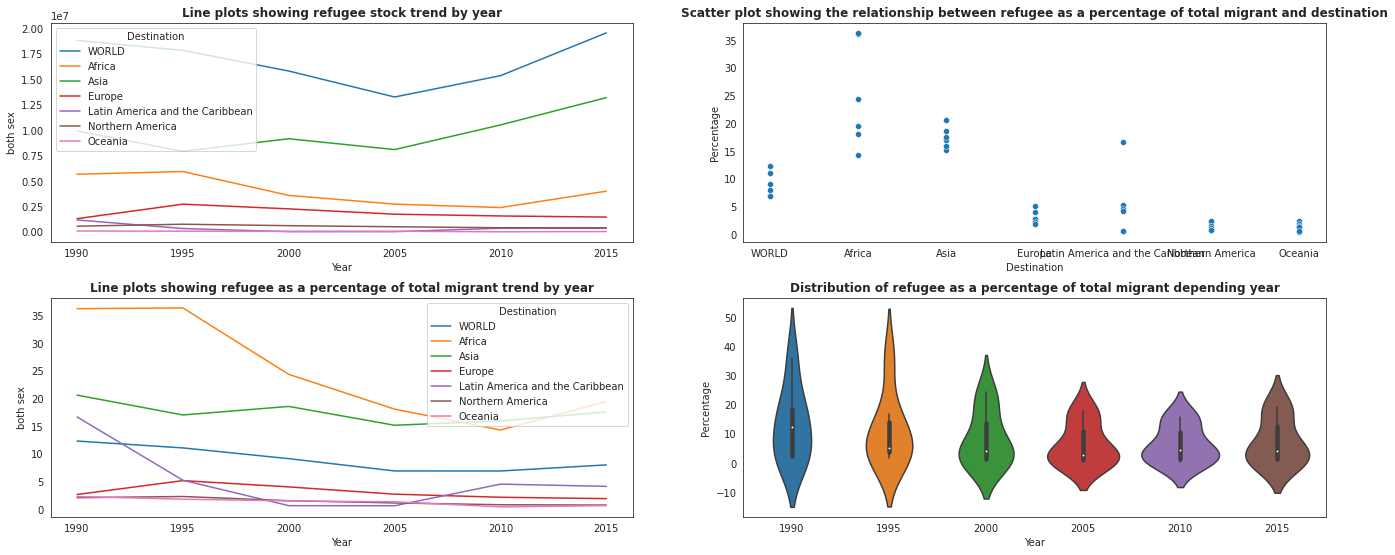

In [182]:
sns.set_style('white')
#we will be showing 
f, ax = plt.subplots(2, 2, figsize=(20,8))

ax[0,0].set_title('Line plots showing refugee stock trend by year', fontweight="bold")
ax[0,0].set_ylabel('both sex')
sns.lineplot(y="both sex", x="Year", hue = "Destination", ci=None, data=dataset6_merge_Continent, ax=ax[0,0])

ax[0,1].set_title('Scatter plot showing the relationship between refugee as a percentage of total migrant and destination',fontweight="bold")
ax[0,1].set_ylabel('Percentage')
sns.scatterplot(y="Percentage", x="Destination", data=dataset6_merge_Continent, ax=ax[0,1])

ax[1,0].set_title('Line plots showing refugee as a percentage of total migrant trend by year', fontweight="bold")
ax[1,0].set_ylabel('both sex')
sns.lineplot(y="Percentage", x="Year", hue = "Destination", ci=None, data=dataset6_merge_Continent, ax=ax[1,0])

ax[1,1].set_title('Distribution of refugee as a percentage of total migrant depending year',fontweight="bold")
ax[1,1].set_ylabel('Survived')
sns.violinplot(y="Percentage", x="Year", data=dataset6_merge_Continent, ax=ax[1,1])
ax[1,1].set_xticklabels(['1990', '1995', '2000', '2005', '2010', '2015'])

f.tight_layout()
f.subplots_adjust(top=.93)
plt.show()